In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv(r'D:\DS-Input-Files\titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


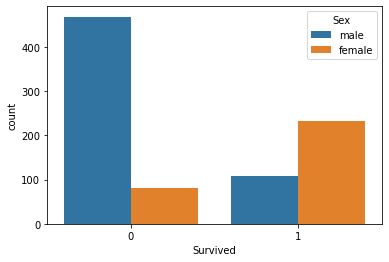

In [6]:
sns.countplot(x='Survived',hue='Sex',data=train)

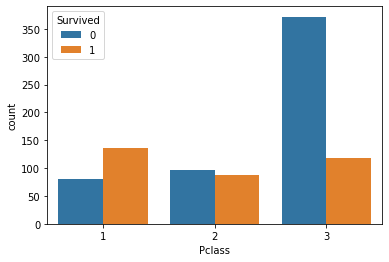

In [7]:
sns.countplot(x='Pclass',hue='Survived',data=train)

In [8]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

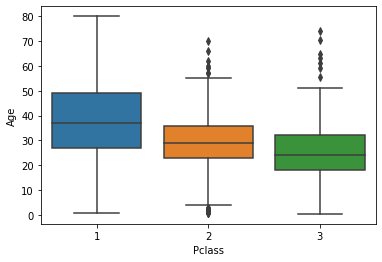

In [10]:
sns.boxplot(x='Pclass',y='Age',data=train)

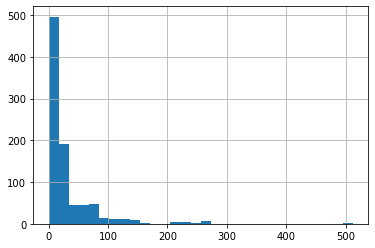

In [11]:
train['Fare'].hist(bins=30)

In [12]:
def imputeage(cols):
    Age = cols[0]
    pclass = cols[1]
    if pd.isnull(Age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 27
    else:
        return Age

In [13]:
train['Age']= train[['Age','Pclass']].apply(imputeage,axis=1)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [16]:
train.dropna(inplace=True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [18]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
train['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [20]:
train['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [21]:
train['SibSp']=train['SibSp'].astype('category')
train['Parch']=train['Parch'].astype('category')

In [22]:
encodedDF = pd.get_dummies(train[['Embarked','Sex','SibSp','Parch']])

In [23]:
X = pd.concat([encodedDF,train.drop(['PassengerId','Name','Ticket','Survived','Embarked','Sex','SibSp','Parch'],axis=1)],axis=1)

In [25]:
#X = train.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
y= train['Survived']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log = LogisticRegression()

In [30]:
log.fit(X_train,y_train)

C:\Users\Nandini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
log.intercept_

array([1.14906883])

In [32]:
log.coef_

array([[ 4.03128523e-01,  5.82028282e-01,  4.38524722e-03,
         1.76847496e+00, -7.78932907e-01,  8.76300805e-01,
         8.35283450e-01,  3.09332597e-01, -5.19030646e-01,
        -6.25277961e-02, -1.81212224e-01, -2.68604134e-01,
         4.52809248e-01,  7.88363580e-01,  1.34629130e-01,
         1.85716051e-01, -3.38555611e-01, -2.33420346e-01,
         0.00000000e+00, -1.04593951e+00, -3.18775602e-02,
         9.61455837e-04]])

In [41]:
predict = log.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [43]:
print(accuracy_score(y_test,predict))

0.8089887640449438


In [44]:
print(confusion_matrix(y_test,predict))

[[98  9]
 [25 46]]


In [45]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       107
           1       0.84      0.65      0.73        71

    accuracy                           0.81       178
   macro avg       0.82      0.78      0.79       178
weighted avg       0.81      0.81      0.80       178



In [46]:
print(roc_auc_score(y_test,predict))

0.7818875872054759


In [47]:
pred_prob = log.predict_proba(X_test)

In [48]:
pred_prob[::,0]

array([0.90780651, 0.84680867, 0.25022817, 0.0811981 , 0.84583956,
       0.96067033, 0.90383342, 0.79118377, 0.9270452 , 0.30915886,
       0.22875894, 0.04544595, 0.90781892, 0.27541836, 0.90768976,
       0.88737331, 0.09798733, 0.12823144, 0.42009563, 0.90781892,
       0.90775721, 0.91025085, 0.61626036, 0.68795111, 0.95485527,
       0.54809248, 0.40914021, 0.2728479 , 0.92672632, 0.72786675,
       0.84630308, 0.66957177, 0.97566247, 0.90236395, 0.89953259,
       0.79629929, 0.22605029, 0.94079335, 0.81691302, 0.87757103,
       0.42974694, 0.87399499, 0.89052752, 0.09058474, 0.40428165,
       0.88425766, 0.41227075, 0.16204705, 0.90656873, 0.75782838,
       0.552148  , 0.21986747, 0.81579358, 0.8871818 , 0.90788695,
       0.93326397, 0.56063558, 0.92030729, 0.88726052, 0.07417699,
       0.30915886, 0.08396125, 0.10310638, 0.90245339, 0.85881475,
       0.95348397, 0.89364472, 0.60652982, 0.94593421, 0.85111248,
       0.67562178, 0.86866288, 0.39678364, 0.10575084, 0.89474

In [49]:
predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [50]:
pred_prob

array([[0.90780651, 0.09219349],
       [0.84680867, 0.15319133],
       [0.25022817, 0.74977183],
       [0.0811981 , 0.9188019 ],
       [0.84583956, 0.15416044],
       [0.96067033, 0.03932967],
       [0.90383342, 0.09616658],
       [0.79118377, 0.20881623],
       [0.9270452 , 0.0729548 ],
       [0.30915886, 0.69084114],
       [0.22875894, 0.77124106],
       [0.04544595, 0.95455405],
       [0.90781892, 0.09218108],
       [0.27541836, 0.72458164],
       [0.90768976, 0.09231024],
       [0.88737331, 0.11262669],
       [0.09798733, 0.90201267],
       [0.12823144, 0.87176856],
       [0.42009563, 0.57990437],
       [0.90781892, 0.09218108],
       [0.90775721, 0.09224279],
       [0.91025085, 0.08974915],
       [0.61626036, 0.38373964],
       [0.68795111, 0.31204889],
       [0.95485527, 0.04514473],
       [0.54809248, 0.45190752],
       [0.40914021, 0.59085979],
       [0.2728479 , 0.7271521 ],
       [0.92672632, 0.07327368],
       [0.72786675, 0.27213325],
       [0.

In [51]:
pred_DB = np.where(pred_prob[:,0]>=0.5,0,1)